In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# Import Data

## Training Dataset

In [22]:
data = pd.read_csv('/content/MNIST_train.csv')
data.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Preprocessing

In [23]:
#checking for any null counts for each features

null_counts = data.isnull().sum()
nan_check_df = pd.DataFrame(null_counts,columns=['NullCounts'])

#print('The sum of nulls for each features: \n{}'.format(null_counts))

nan_check_df = nan_check_df[nan_check_df['NullCounts']>0]
nan_check_df

,NullCounts


In [24]:
#Converting the dataframe to matrix
X = data.to_numpy()
X

array([[    0,     0,     5, ...,     0,     0,     0],
       [    1,     1,     0, ...,     0,     0,     0],
       [    2,     2,     4, ...,     0,     0,     0],
       ...,
       [59997, 59997,     5, ...,     0,     0,     0],
       [59998, 59998,     6, ...,     0,     0,     0],
       [59999, 59999,     8, ...,     0,     0,     0]])

In [25]:
#shape of the dataset
X.shape

(60000, 787)

In [26]:
#datapoints to store the targets of MNIST dataset
y = X[:,2]
y

array([5, 0, 4, ..., 5, 6, 8])

In [27]:
#datapoints to store all the features of MNIST dataset
X = X[:,3:]
X.shape

(60000, 784)

In [28]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
# Scaling the dataset using min-max function : X = (Xi - Xmin)/(Xmax - Xmin)
X = X/255

In [30]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
X.max()

1.0

## Testing Dataset

In [52]:
data_test = pd.read_csv("/content/MNIST_test.csv")
data_test.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X_test = data_test.to_numpy()
X_test.shape

(10000, 787)

In [54]:
y_test = X_test[:,2]
y_test.shape

(10000,)

In [55]:
X_test = X_test[:,3:]
X_test.shape

(10000, 784)

In [56]:
X_test = X_test / 255

In [57]:
X_test.shape

(10000, 784)

# Visualisations

In [58]:
def show_me(X):
    plt.imshow(X.reshape(28,28))


def show_me_all_mean(X, y, k):
    show_me(sum(X[ y==k, :]/len(X[ y==k, :])))

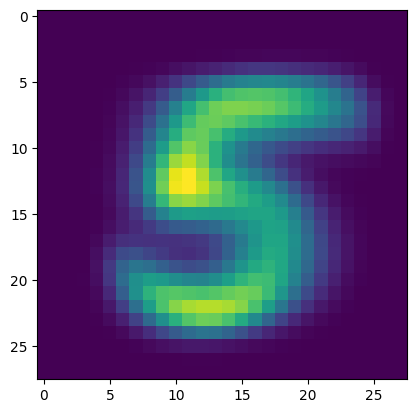

In [59]:
show_me_all_mean(X, y, 5)

# Model Selection

## Naive Baeyes Model

In [60]:
from scipy.stats import multivariate_normal as mvn

In [61]:
class GaussNB():

    def fit(self, X, y, epsilon = 1e-2):
        self.likelihoods = dict()
        self.priors = dict()
        self.K =set(y.astype(int))

        for k in self.K:
          X_k = X[y==k]
          # Naive Assumption: Observations are linearly independent of each other
          self.likelihoods[k] ={"mean": X_k.mean(axis=0), "cov":X_k.var(axis=0)+epsilon}
          self.priors[k] = len(X_k)/len(X)


    def predict(self, X):
        N , D = X.shape
        P_hat = np.zeros((N,len(self.K)))

        for k , l in self.likelihoods.items():
          P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"])+np.log(self.priors[k])

        return P_hat.argmax(axis=1)

In [62]:
gnb = GaussNB()

In [63]:
gnb.fit(X,y)

In [64]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
y_hat = gnb.predict(X)

### Testing Naive Baeyes

In [66]:
y_hat_test = gnb.predict(X_test)

In [67]:
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

#### Training Accuracy

In [68]:
accuracy(y,y_hat)

0.8015833333333333

#### Testing Accuracy

In [69]:
accuracy(y_test,y_hat_test)

0.8141

## Non-Naive Baiyes

In [70]:
class GaussBayes():

    def fit(self, X, y, epsilon = 1e-2):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = set(y.astype(int))

        for k in self.K:
            X_k = X[y==k,:]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis = 0)

            self.likelihoods[k] = {"mean":mu_k, "cov":1/(N_k - 1)*np.matmul((X_k-mu_k).T,X_k-mu_k) + epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)


    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X,l["mean"], l["cov"]) + np.log(self.priors[k])
        return P_hat.argmax(axis = 1)

In [71]:
nonNaive = GaussBayes()

In [72]:
nonNaive.fit(X,y)

### Testing Non-Naive Baeyes

In [73]:
y_hat = nonNaive.predict(X)

In [74]:
y_hat_test = nonNaive.predict(X_test)

In [75]:
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

#### Training Accuracy

In [76]:
accuracy(y,y_hat)

0.9555333333333333

#### Testing Accuracy

In [77]:
accuracy(y_test,y_hat_test)

0.9473

# K-Nearest Neighbour

In [82]:
class KNNClassifier():

    def fit(self, X, y):
        self.X = X
        self.y = y


    def predict(self, X, K, epsilon=1e-2):

        N = len(X)
        y_hat = np.zeros(N)

        for i in range(N):
            dist2 = np.sum(((self.X - X[i])**2),axis = 1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = 1/(np.sqrt(dist2[idxt] + epsilon))

            y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()

        return y_hat

In [83]:
knnclass =  KNNClassifier()

In [84]:
knnclass.fit(X,y)

In [85]:
#y_hat = knnclass.predict(X,3)

### Testing KNN

In [ ]:
y_hat = knnclass.predict(X)

In [86]:
y_hat_test = knnclass.predict(X_test,3)

#### Training Accuracy

In [ ]:
accuracy(y,y_hat)

#### Testing Accuracy

In [87]:
y_hat_test.astype(int)

array([7, 2, 1, ..., 4, 5, 6])

In [88]:
accuracy(y_test,y_hat_test)

0.9717

In [89]:
accuracy(y_test,y_hat_test)

0.9717

# Visualization

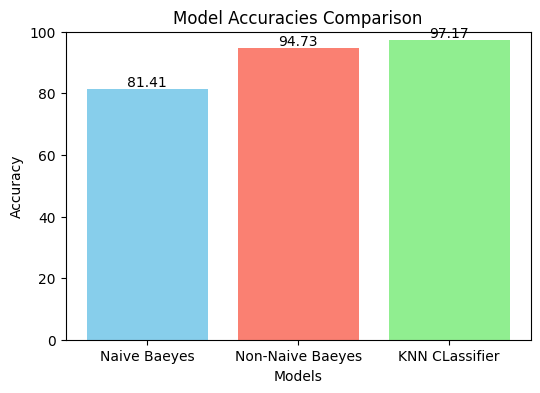

In [90]:
model_names = ['Naive Baeyes', 'Non-Naive Baeyes', 'KNN CLassifier']
accuracies = [81.41, 94.73, 97.17]  # Replace with actual accuracies

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(model_names, accuracies, color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.ylim(0, 100)  # Set y-axis from 0 to 1 for accuracy

# Display values on top of bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center', va='bottom')

plt.show()

In [92]:
from sklearn.manifold import TSNE
import plotly.express as px

df = pd.read_csv('/content/MNIST_train.csv')


features = df.loc[:, '0':]



In [93]:
df.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.species, labels={'color': 'labels'}
)
fig.update_traces(marker_size=8)
fig.show()